# Análisis de datos de Airbnbs en Nueva York

## Resumen

En los últimos años la plataforma Airbnb ha ganado gran popularidad en Nueva York, lo que ha generado preocupaciones sobre su impacto en la disponibilidad de viviendas a largo plazo y el aumento en los precios de alquiler (gentrificación). En el siguiente notebook, se explora el uso de la plataforma despues de la aprobación del 5 de septiembre del 2023 de la Ley de Registro de Alquileres a Corto Plazo, diseñada para regular la oferta de propiedades en plataformas como Airbnb. Esta ley ha impuesto restricciones significativas, limitando los alquileres a corto plazo no registrados. El objetivo de este análisis es comparar cómo han cambiado la oferta y las tendencias de uso de Airbnb antes y después de la implementación de esta ley.

![Imagen](logo_Airbnb.jpg)

Este trabajo se divide en 4 secciones:
 1. ¿Cómo se usa Airbnb?
 2. Descripción de los datos utilizados
 3. Ideas clave después de la Ley Local 18 - Ley de Registro de Alquileres a Corto Plazo
 4. Conclusión

_______________________________

##### Fecha: Septiembre 2024 
##### Autores: Abner Colli Sanchez, María Dolores Matus Basto y Samuel Muñoz Villarino 

______________________________________

## 1. ¿Cómo se usa Airbnb?

[Airbnb](https://airbnb.mx/) es una plataforma en línea que permite a los usuarios (huespedes) buscar y reservar alojamiento en todo el mundo, así como ofrecer sus [propiedades (ya sean habitaciones, apartamentos, casas o cualquier otro tipo de alojamiento)](https://www.airbnb.com/help/article/5/what-does-the-room-type-of-a-listing-m) para alquilar (anfitriones). Los huespedes pueden buscar y reservar alojamientos en función de su ubicación, presupuesto y fechas. Tanto los anfitriones como los huéspedes cuentan con verificación de identidad.

### 1.1 Anfitrion

Para [registrar una propiedad en Airbnb](https://www.airbnb.mx/host/homes) y ser el anfitrión se realizan los siguientes pasos:

1. **Descripción del espacio**: Agregar algunos datos básicos, tales como: la ubicación, cuántos huéspedes pueden quedarse, entre otros.

2. **Hacer que destaque**: Agregar al menos cinco fotos, un título y una descripción.

3. **Terminar y publicar**: Elegir un precio inicial, verificar algunos detalles y publicar un anuncio.


### 1.2 Huesped 

Para acceder a [Airbnb como huesped](https://airbnb.mx/), se realizan los siguientes pasos: 
1. Registrarse a Airbnb e iniciar sección
2. Completar el perfil y verificar identidad
3. Elegir un Airbnb de acuerdo a su ubicación, presupuesto y fechas
4. Revisar las fotos, evaluaciones y reglas de la casa 
5. Contactar al anfitrión para cualquier pregunta 
6. Confirmar la hora de llegada y salida con el anfitrión 
7. Solicitar instrucciones para acceder al alojamiento 
8. Verificar si el anfitrión estará para entregar las llaves o si se utilizará otro método de acceso 
9. Consultar las instrucciones para la llegada en la información del viaje

![Imagen](Airbnb_huesped.jpg)

## 2. Descripción de los datos utilizados

### Recopilación de datos de Airbnb

Los datos utilizados provienen del proyecto [Inside Airbnb](https://insideairbnb.com/) [Nueva York](https://insideairbnb.com/new-york-city/), el cual es un proyecto con el objetivo de proporcionar datos y promover la concienciación sobre el impacto de Airbnb en las comunidades residenciales. Su objetivo es trabajar para lograr una visión en la que las comunidades están empoderadas con datos e información para que puedan comprender, decidir y controlar el rol que desempeña el alquiler de viviendas residenciales a los turistas. El proyecto cuenta con la colaboración y contribuciones de diversas personas y organizaciones. 

Paquetes por instalar: 
- Numpy
- Panda
- seaborn
- IPython
- folium
- matplotlib

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Los datos de los Airbnbs de Nueva York fueron obtenidos en la sección [Get the Data](https://insideairbnb.com/get-the-data/), cuya última actualización se realizó el 4 de septiembre de 2024, se seleccionaron los siguientes archivos para su análisis:
- listings.csv: contiene información detallada sobre los Airbnbs de la ciudad de Nueva York, como 
precios, ubicación y características de las propiedades.
- neighbourhoods.csv: proporciona información sobre los vecindarios donde se encuentran los Airbnbs.
- reviews.csv: contiene las fechas en que se realizaron los comentarios de los usuarios que se han alojado en las 
propiedades de Airbnb.




#### Extraer y leer los datos

In [2]:

data_listings = pd.read_csv("listings_NY.csv")
data_neighbourhoods = pd.read_csv("neighbourhoods_NY.csv")
data_reviews = pd.read_csv("reviews_NY.csv")

Se tiene la información de 37541 Airbnbs en Nueva York, las cuales registraron reseñas de usuarios entre el 25 de mayo de 2009 y el 04 de septiembre del presente año, distribuidos en 225 vecindarios y cuyas propiedades pertenecen a 22458 anfitriones diferentes.

In [3]:
print(data_listings.shape)
print(min(data_reviews.date))
print(max(data_reviews.date))
print(data_neighbourhoods.shape)
print(data_reviews.shape)
print(data_listings.host_id.nunique())
print(data_reviews.listing_id.nunique())
print(data_listings.neighbourhood.nunique())

(37541, 18)
2009-05-25
2024-09-04
(230, 2)
(947328, 2)
22458
26001
225


### Análisis descriptivo de los datos de Airbnb

In [21]:
data_listings.columns

(37541, 18)

### Variables

Las bases de datos utilizadas en este trabajo son públicas, se omite el nombre de los anfitriones por evitar que se identifiquen a los anfitriones para preservar su privacidad.

In [5]:
data_listings_final2 = data_listings.drop(columns = ['host_name'])
data_listings_final2.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1189243425411300671,The Grand III,61391963,Manhattan,Murray Hill,40.750251,-73.977745,Entire home/apt,58.0,30,1,2024-08-02,0.86,130,357,1,NaN
1,651593916026998398,Cheerful one bedroom townhouse with backyard,136812643,Brooklyn,Flatlands,40.624760,-73.935560,Private room,80.0,30,0,NaN,NaN,1,365,0,NaN
2,310325,Large Sunny Bedroom with Bay Window,745069,Manhattan,Harlem,40.823590,-73.946010,Private room,75.0,30,31,2019-09-28,0.21,2,335,0,NaN
3,572612125615500056,Room by Sunny & Bay! Sunset Park & Bay Ridge,358089614,Brooklyn,Sunset Park,40.639520,-74.014840,Private room,45.0,30,6,2024-07-30,0.21,2,336,1,NaN
4,1020282701018874374,Trendy Private Bedroom,483056418,Brooklyn,Bedford-Stuyvesant,40.678946,-73.943759,Private room,47.0,30,0,NaN,NaN,24,269,0,NaN


In [6]:
data_listings_final = data_listings_final2.drop(columns = ['name','license', 'availability_365', 'number_of_reviews_ltm','calculated_host_listings_count', 'reviews_per_month'])


Las variables elegidas en este trabajo son:
- id: Identificador único de Airbnb
- host_id: Identificador único de Airbnb para el anfitrión/usuario
- neighbourhood_group: Grupo de vecindario en el que se ubica el Airbnb
- neighbourhood: Vecindario en el que se ubica el Airbnb
- latitude: Para dibujar el listing
- longitude: Para dibujar el listing                      
- room_type: Todas las casas se agrupan en los siguientes tres tipos de habitaciones: Alojamiento completo, habitación privada y habitación compartida.                 
- price: Precio diario en moneda local                        
- minimum_nights: Número mínimo de noches de estancia para el alojamiento                 
- number_of_reviews: El número de reseñas que tiene el anuncio.                  
- last_review: La fecha de la última/más reciente reseña
- date: Fecha en la que se realizó la reseña. 

In [20]:
df_final = data_listings_final.merge(
    data_reviews,
    how='right',left_on='id', right_on = 'listing_id'
)
df_final=df_final.drop(columns=['listing_id'])
df_final.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,range_prices,date
0,2595,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,2022-06-21,151-500,2009-11-21
1,2595,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,2022-06-21,151-500,2009-12-05
2,2595,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,2022-06-21,151-500,2009-12-10
3,2595,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,2022-06-21,151-500,2010-04-09
4,2595,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,2022-06-21,151-500,2010-05-25


In [8]:
df_final_sin_precio_na = df_final.dropna(subset = ['price'])
df_final_sin_precio_na.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,date
0,2595,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,2022-06-21,2009-11-21
1,2595,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,2022-06-21,2009-12-05
2,2595,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,2022-06-21,2009-12-10
3,2595,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,2022-06-21,2010-04-09
4,2595,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,2022-06-21,2010-05-25


In [9]:
df_final['date']= pd.to_datetime(df_final['date'])

df_final_antes = df_final.loc[(df_final['date']>='2022-09-05') & (df_final['date'] < '2023-09-05')]
df_final_despues = df_final.loc[df_final['date'] >= '2023-09-05']

In [10]:
df_final.dtypes

id                              int64
host_id                         int64
neighbourhood_group            object
neighbourhood                  object
latitude                      float64
longitude                     float64
room_type                      object
price                         float64
minimum_nights                  int64
number_of_reviews               int64
last_review                    object
date                   datetime64[ns]
dtype: object

> ## 

## 3.  Ideas clave después de la Ley Local 18 - Ley de Registro de Alquileres a Corto Plazo

La ciudad de Nueva York ha implementado restricciones a Airbnb y otros sitios de alquileres a corto plazo para regular el mercado de alquileres y evitar que se exploten a los inquilinos: 
##### Ley Local 18 - Ley de Registro de Alquileres a Corto Plazo
Esta ley, que entró en vigor en septiembre de 2023. Consta de lo siguiente:
- Exige que los anfitriones de alquileres a corto plazo se registren en la ciudad y que estén físicamente presentes durante el alquiler, es decir, solo permite a los anfitriones alojar como máximo a dos personas a la vez y les obliga a estar físicamente presentes en la vivienda durante la estancia, que no puede superar los 30 días.
- Tanto el anfitrion como los visitantes están obligados a dejar las puertas abiertas, más bien no cerrarlas con llave, para que los ocupantes puedan acceder en todo momento a todas las habitaciones.
- Prohíbe que plataformas como Airbnb gestionen estancias breves que no estén registradas. 
- Queda descartada totalmente la posibilidad de alquilar un apartamento entero.

##### Objetivo de la ley
La ley busca regular un mercado en el que muchos anfitriones alquilaban unidades que no cumplían con los requisitos de seguridad, además de aumentar los precios y contribuir a la escasez de viviendas en la ciudad para residentes locales. 







![Imagen](Airbnb_noti.jpg)

In [11]:
bins = [0, 150, 500, 1000, 5000, 10000, 20000,100000]  # Define los límites de los rangos
labels = ['0-150', '151-500', '501-1000', '1001-5000', '5001-10000', '10001-20000', '20001-100000'] 
data_listings_final['range_prices'] = pd.cut(data_listings_final['price'], bins=bins, labels=labels, right=False)

In [12]:
data_listings_final[['range_prices']].value_counts()

range_prices
0-150           11529
151-500          9521
501-1000         1373
1001-5000         347
5001-10000         10
10001-20000         5
20001-100000        3
Name: count, dtype: int64

In [13]:
table_pivot = pd.pivot_table(data_listings_final[data_listings_final.price<5000], values='number_of_reviews', index=['room_type'],
                       columns=['range_prices'])

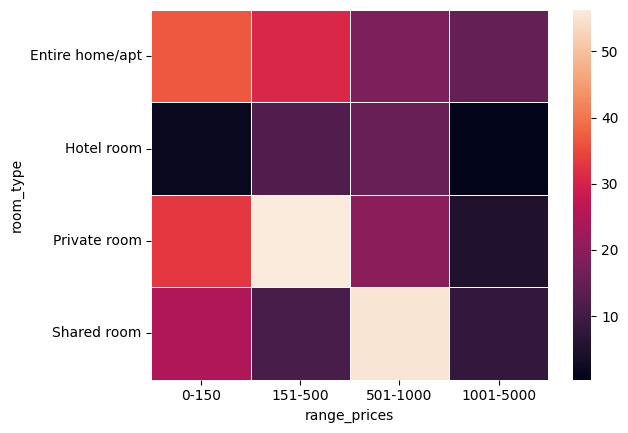

In [14]:
sns.heatmap(table_pivot, linewidths=0.5, linecolor='white')
plt.show()

Este mapa de calor nos indica que el número de reseñas es mayor en los Airbnbs que ofrecen cuarto privado con un rango entre $\$151$ y $\$500$ y habitación compartida con valor entre $\$501$ y $\$1000$, seguidos de los que ofrecen casa completa con precios menores a $\$500$ y cuartos privados con precio menores a $\$150$. Por otro lado, se tienen menor número de reseña en los cuartos de hotel con valores menores a $\$150$ y mayores a $\$1000$.

In [15]:
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 5.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [16]:
import folium
from folium.plugins import HeatMap

mapa_antes= folium.Map(location=[40.7128, -74.0060], zoom_start=11)
mapa_despues = folium.Map(location=[40.7128, -74.0060], zoom_start=11)


# Crear capa de calor
HeatMap(df_final_antes[['latitude', 'longitude']].dropna()).add_to(mapa_antes)

HeatMap(df_final_despues[['latitude', 'longitude']].dropna()).add_to(mapa_despues)

mapa_antes.save('mapa_antes.html')

mapa_despues.save('mapa_despues.html')

import IPython
src1= './mapa_antes.html'
IPython.display.IFrame(src1, width=974, height=500)

In [17]:
src2= './mapa_despues.html'
IPython.display.IFrame(src1, width=974, height=500)

Observando los mapas de calor (antes y después de la Ley), sin hacer zoom a primera vista podemos notar que los mapas de calor son bastante parecidos. Al hacer zoom y observar avenidas, parques, colonias, podemos notar que el número de reviews ha decrecido en los últimos meses. El mapa de "antes" describe los reviews de la fecha del 05 de septiembre 2022 al 04 de septiembre 2023, un día antes de aprobarse la ley. El mapa de "después" describe los reviews del 05 de septiembre 2023 a la fecha actual.

In [18]:
import IPython
src1= 'https://lookerstudio.google.com/embed/reporting/516f65e0-aaef-4a25-86ab-e1e99f1340db/page/CkkCE'
IPython.display.IFrame(src1, width=974, height=500)

Si observamos la tendencia de los airbnb en la periodicidad de los reviews por mes, notamos que los meses de enero y febrero suelen ser los meses más bajos de Airbnb, esto se sabe porque son las fechas después de las fiestas navideñas y Nueva York en invierno tiene temperaturas muy frías, lo que provoca que el turismo baje en esta temporada.

- Se puede observar que después de cada febrero hay una tendencia a que las rentas suban
- También se observa que las fechas de verano (Julio, Agosto, Septiembre) las rentas llegan a sus máximos en el año
  
- Hay dos eventos donde no se sigue esta regla:
  1. En el mes de abril de 2020 no siguió la tendencia de los demás años, esto coincide con las fechas de inicio de la pandemia por COVID-19.
  2. En el mes de octubre de 2023 cuando se aprueba la ley se ve una caida en la tendencia normal de las rentas de los últimos años

### 4. Conclusión

La Ley de Registro de Alquileres a Corto Plazo implamenta en Nueva York el 05 de septiembre de 2023 ha afectado la persepción de los huéspedes que utilizan la plataforma de Airbnb. 